In [13]:
%run "/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/training_module.ipynb"

In [14]:

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow import keras

from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import StringLookup

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
import cv2

import matplotlib.image as mpimg

In [16]:

styles = get_df()

styles["subCategory"].unique() # we can check by this code that we only have three subcategory now.


array(['Topwear', 'Bottomwear', 'Footwear'], dtype=object)

In [17]:

le = LabelEncoder()
#
styles["subCategory"] = le.fit_transform(styles["subCategory"])

styles.head()

le.classes_



array(['Bottomwear', 'Footwear', 'Topwear'], dtype=object)

In [18]:

# styles, articleTypeLB, genderLB, baseColourLB, seasonLB, usageLB = my_le(styles)

sub_train,sub_val,sub_test=make_input_xx(make_input_array_subcate(styles))
sub_model = building_model(80,60)
sub_model.summary()



Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/28492.jpg': Invalid shape
Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/14776.jpg': Invalid shape
Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/5408.jpg': Invalid shape
Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/1799.jpg': Invalid shape
Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/2311.jpg': Invalid shape
Error reading image '/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/10284.jpg': Invalid shape
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)        

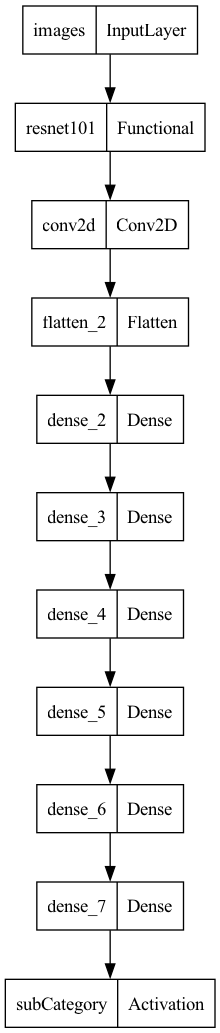

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(sub_model)

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(sub_model)
sub_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

sub_history = sub_model.fit(sub_train, 
                    epochs=10, 
                    steps_per_epoch = 2000,
                    validation_data = sub_val)

sub_model.save("/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_sub")

test_model = tf.keras.models.load_model("/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_sub")

test_model.evaluate(sub_test)

Epoch 1/10


/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/environment/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2000/2000 [==============================] - 177s 87ms/step - loss: 0.2400 - accuracy: 0.9582 - val_loss: 0.1101 - val_accuracy: 0.9705
Epoch 2/10
2000/2000 [==============================] - 166s 83ms/step - loss: 0.1785 - accuracy: 0.9735 - val_loss: 0.0559 - val_accuracy: 0.9850
Epoch 3/10
2000/2000 [==============================] - 164s 82ms/step - loss: 0.1342 - accuracy: 0.9860 - val_loss: 0.0787 - val_accuracy: 0.9906
Epoch 4/10
2000/2000 [==============================] - 170s 85ms/step - loss: 0.0689 - accuracy: 0.9852 - val_loss: 0.0448 - val_accuracy: 0.9919
Epoch 5/10
2000/2000 [==============================] - 123s 61ms/step - loss: 0.0304 - accuracy: 0.9887 - val_loss: 0.0502 - val_accuracy: 0.9908
INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_sub/assets


INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_sub/assets
/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/environment/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2727/2727 [==============================] - 92s 33ms/step - loss: 0.0777 - accuracy: 0.9910


[0.07770869135856628, 0.9910141229629517]

In [21]:

top_df = get_234_df("Topwear")
bottom_df = get_234_df("Bottomwear")
foot_df = get_234_df("Footwear")
top_df,top_art,top_gen,top_base,top_sea,top_usage = my_le(top_df)
bottom_df,bottom_art,bottom_gen,bottom_base,bottom_sea,bottom_usage = my_le(bottom_df)
foot_df,foot_art,foot_gen,foot_base,foot_sea,foot_usage = my_le(foot_df)
foot_usage.classes_

top_base_model = build_model(80,60,top_art,top_gen,top_base,top_sea,top_usage)
bottom_base_model = build_model(80,60,bottom_art,bottom_gen,bottom_base,bottom_sea,bottom_usage)
foot_base_model = build_model(80,60,foot_art,foot_gen,foot_base,foot_sea,foot_usage)


In [22]:
top_train, top_val, top_test = make_input_xx(make_input_array_2(top_df))


In [23]:
bottom_train, bottom_val, bottom_test = make_input_xx(make_input_array_2(bottom_df))


In [24]:
foot_train, foot_val, foot_test = make_input_xx(make_input_array_2(foot_df))


Error processing image 10284: Failed to load image at path: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/10284.jpg


In [25]:
import tensorflow.keras as keras
from kerastuner import RandomSearch

def build_model(hp):
    # Use the same architecture as your original model
    res101 = keras.applications.ResNet101(weights='imagenet', include_top=False, input_shape=(80, 60, 3))
    res101.trainable = False
    inputs = keras.Input(shape=(80, 60,3),name="images")
    x = res101(inputs, training=False)
    x = layers.Flatten()(x)
    x = layers.Dense(hp.Int('dense_units', min_value=32, max_value=512, step=32), activation='relu')(x)
    # ... rest of your model architecture ...

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model


In [26]:





foot_train, foot_val, foot_test = make_input_xx(make_input_array_2(foot_df))

top_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
bottom_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
foot_base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

top_history = top_base_model.fit(top_train, 
                    epochs=10, 
                    steps_per_epoch = 500,
                    validation_data = top_val)

top_base_model.evaluate(top_test)

top_base_model.save("/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_top")



bottom_history = bottom_base_model.fit(bottom_train, 
                    epochs=15, 
                    steps_per_epoch = 50,
                    validation_data = bottom_val)

bottom_base_model.evaluate(bottom_test)

bottom_base_model.save("/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_bottom")



foot_history = foot_base_model.fit(foot_train, 
                    epochs=5, 
                    steps_per_epoch = 2000,
                    validation_data = foot_val)

foot_base_model.evaluate(foot_test)

foot_base_model.save("/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_foot")


Error processing image 10284: Failed to load image at path: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/Miniversion/smalldataset/images/10284.jpg
Epoch 1/10


/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/environment/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 [==============================] - 81s 156ms/step - loss: 6.8932 - articleType_loss: 1.6194 - gender_loss: 0.7615 - baseColour_loss: 2.5967 - season_loss: 0.9354 - usage_loss: 0.9802 - articleType_accuracy: 0.5670 - gender_accuracy: 0.7670 - baseColour_accuracy: 0.2000 - season_accuracy: 0.5520 - usage_accuracy: 0.7280 - val_loss: 6.4762 - val_articleType_loss: 1.4227 - val_gender_loss: 0.4593 - val_baseColour_loss: 2.5736 - val_season_loss: 1.2650 - val_usage_loss: 0.7556 - val_articleType_accuracy: 0.6294 - val_gender_accuracy: 0.8495 - val_baseColour_accuracy: 0.1362 - val_season_accuracy: 0.4103 - val_usage_accuracy: 0.7685
Epoch 2/10
500/500 [==============================] - 81s 162ms/step - loss: 5.4441 - articleType_loss: 1.1437 - gender_loss: 0.5039 - baseColour_loss: 2.2892 - season_loss: 0.8092 - usage_loss: 0.6981 - articleType_accuracy: 0.6750 - gender_accuracy: 0.8260 - baseColour_accuracy: 0.2750 - season_accuracy: 0.6070 - usage_accuracy: 0.7730 - val_loss: 5.20

1539/1539 [==============================] - 53s 34ms/step - loss: 4.0378 - articleType_loss: 0.8162 - gender_loss: 0.2951 - baseColour_loss: 1.7505 - season_loss: 0.7479 - usage_loss: 0.4281 - articleType_accuracy: 0.7450 - gender_accuracy: 0.9129 - baseColour_accuracy: 0.4594 - season_accuracy: 0.6153 - usage_accuracy: 0.8626
INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_top/assets


INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_top/assets


Epoch 1/15


/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/environment/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 14s 235ms/step - loss: 14.8451 - articleType_loss: 3.8465 - gender_loss: 2.3366 - baseColour_loss: 3.4422 - season_loss: 2.7565 - usage_loss: 2.4633 - articleType_accuracy: 0.3300 - gender_accuracy: 0.4300 - baseColour_accuracy: 0.1800 - season_accuracy: 0.4800 - usage_accuracy: 0.5600 - val_loss: 8.1330 - val_articleType_loss: 2.2103 - val_gender_loss: 1.2262 - val_baseColour_loss: 2.1012 - val_season_loss: 0.8981 - val_usage_loss: 1.6972 - val_articleType_accuracy: 0.3799 - val_gender_accuracy: 0.5084 - val_baseColour_accuracy: 0.2942 - val_season_accuracy: 0.5940 - val_usage_accuracy: 0.2849
Epoch 2/15
50/50 [==============================] - 11s 226ms/step - loss: 7.4037 - articleType_loss: 2.1403 - gender_loss: 0.9334 - baseColour_loss: 2.1134 - season_loss: 1.1197 - usage_loss: 1.0968 - articleType_accuracy: 0.3500 - gender_accuracy: 0.6300 - baseColour_accuracy: 0.3300 - season_accuracy: 0.5400 - usage_accuracy: 0.6400 - val_loss: 6.8974 

INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_bottom/assets


Epoch 1/5


/Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/environment/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2000/2000 [==============================] - 151s 74ms/step - loss: 5.4539 - articleType_loss: 1.2283 - gender_loss: 0.7369 - baseColour_loss: 1.6989 - season_loss: 1.1664 - usage_loss: 0.6234 - articleType_accuracy: 0.5565 - gender_accuracy: 0.7567 - baseColour_accuracy: 0.4787 - season_accuracy: 0.4845 - usage_accuracy: 0.7755 - val_loss: 4.6038 - val_articleType_loss: 1.0845 - val_gender_loss: 0.5617 - val_baseColour_loss: 1.4809 - val_season_loss: 1.0160 - val_usage_loss: 0.4608 - val_articleType_accuracy: 0.6542 - val_gender_accuracy: 0.8227 - val_baseColour_accuracy: 0.5356 - val_season_accuracy: 0.5481 - val_usage_accuracy: 0.8515
Epoch 2/5
 759/2000 [==========>...................] - ETA: 1:13 - loss: 4.6522 - articleType_loss: 0.9656 - gender_loss: 0.6038 - baseColour_loss: 1.5004 - season_loss: 1.0740 - usage_loss: 0.5084 - articleType_accuracy: 0.6528 - gender_accuracy: 0.7984 - baseColour_accuracy: 0.5613 - season_accuracy: 0.5441 - usage_accuracy: 0.8149WARNING:tensorflow:

920/920 [==============================] - 31s 34ms/step - loss: 4.4223 - articleType_loss: 0.9373 - gender_loss: 0.5481 - baseColour_loss: 1.4532 - season_loss: 1.0305 - usage_loss: 0.4531 - articleType_accuracy: 0.6772 - gender_accuracy: 0.8250 - baseColour_accuracy: 0.5571 - season_accuracy: 0.5370 - usage_accuracy: 0.8435
INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_foot/assets


INFO:tensorflow:Assets written to: /Users/rijanbhandari/COLLEGE/sixthsem/minorproject/Pahiran/RESTART/model/model_foot/assets
